## Machine Learning Project / Case study  using "Airbnb Data" from Kaggle.com 
## submitted by  Pranav Sudhakar Mahajan

## Importing Libraries

In [1]:
'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
from scipy import stats            # Linear Algebra
import pandas as pd                # Data Processing

'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib


'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn import svm

'''warning message'''
import warnings
warnings.filterwarnings('ignore')

## Understand data of case study :-

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

d = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


<ul>
<li>id: listing ID</li>
<li>name: name of the listing</li>
<li>host_id: host ID</li>
<li>host_name: name of the host</li>
<li>neighbourhood_group: location</li>
<li>neighbourhood: area</li>
<li>latitude: latitude coordinates</li>
<li>longitude: longitude coordinates</li>
<li>room_type: listing space type</li>
<li>price: price in dollars</li>
<li>number_of_reviews: number of reviews</li>
<li>last_review: latest review</li>
<li>reviews_per_month: number of reviews per month</li>
<li>calculated_host_listings_count: amount of listing per host</li>
<li>availability_365: number of days when listing is available for booking</li>
</ul>

## Exploratory Data Analysis (EDA) :-

<p>The info() function is used to print a concise summary of a DataFrame</p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Missing Values of data :-

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

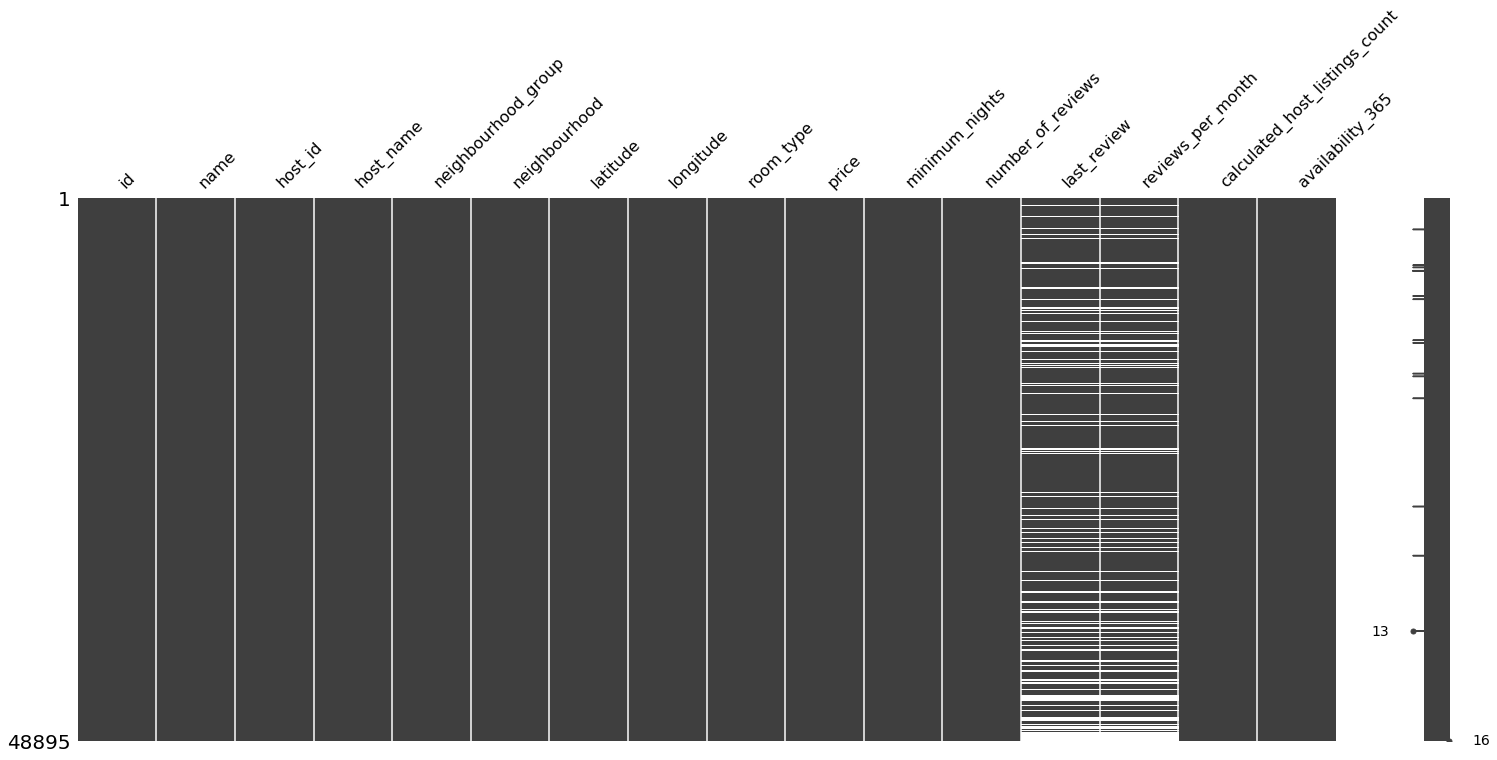

In [6]:
# Missingno library offers a very nice way to visualize the distribution of NaN values.
import missingno as msno 
msno.matrix(df)

<p>Handling missing values by fillna method</p>

In [7]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.fillna({'name':"NoName"}, inplace=True)
df.fillna({'host_name':"NoName"}, inplace=True)
df.fillna({'last_review':"NotReviewed"}, inplace=True)

In [8]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

<p>dropping columns that are not significant or could be unethical to use for our future data exploration and predictions</p>

In [9]:
df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [10]:
#shape of data 
df.shape

(48895, 12)

<p>The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.</p> 
<p>It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.</p>

In [11]:
df.describe().T
#T refers to transpose that displays the description of our dataset in long format.

,count,mean,std,min,25%,50%,75%,max
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,48895.0,1.090910e+00,1.597283e+00,0.00000,4.000000e-02,3.700000e-01,1.580000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


<p> Data </p>

In [12]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 48895
Columns  : 12

Features :
     : ['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Missing values    : 0

Unique values :  
 host_id                           37457
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64


## Data Visualization :-

<p>Visualization of data is use to search for pattern, that can help to solve problem.</p>

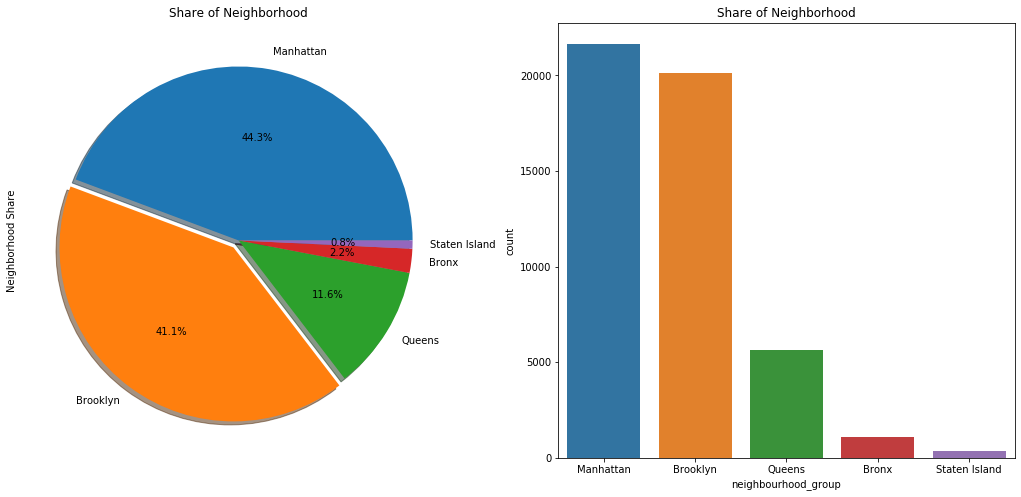

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.05,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Neighborhood')
ax[0].set_ylabel('Neighborhood Share')
sns.countplot('neighbourhood_group',data=df,ax=ax[1],order=df['neighbourhood_group'].value_counts().index)
ax[1].set_title('Share of Neighborhood')
plt.show()

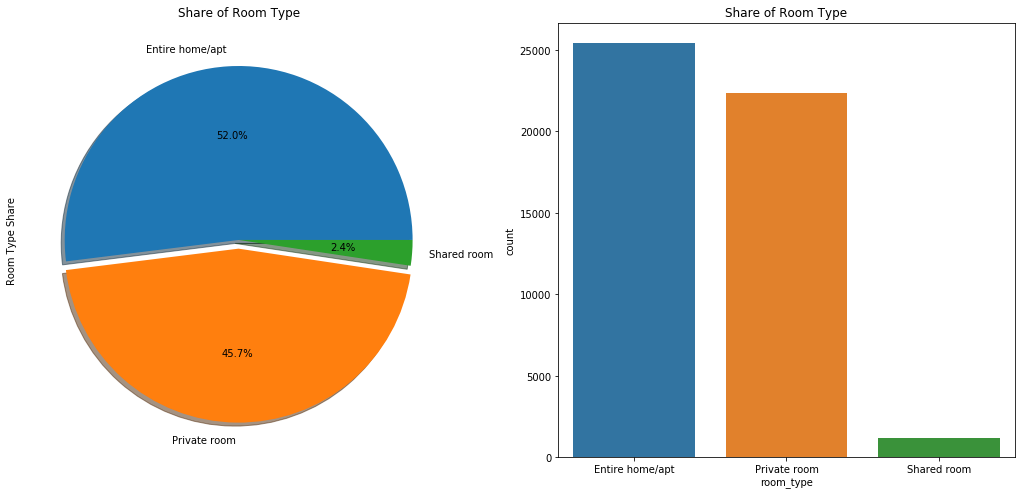

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['room_type'].value_counts().plot.pie(explode=[0,0.05,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Room Type')
ax[0].set_ylabel('Room Type Share')
sns.countplot('room_type',data=df,ax=ax[1],order=df['room_type'].value_counts().index)
ax[1].set_title('Share of Room Type')
plt.show()

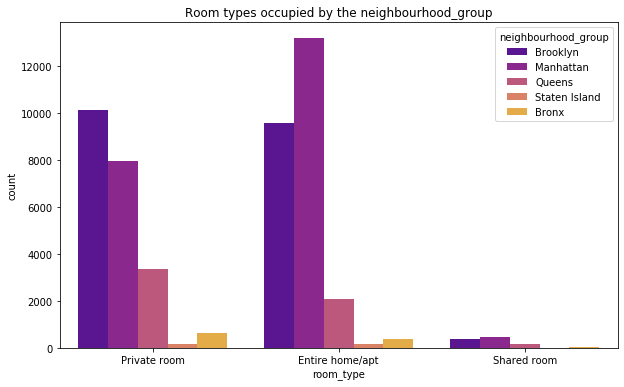

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = df,palette="plasma")
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

Text(0.5, 1.0, 'Restaurants delivering online or Not')

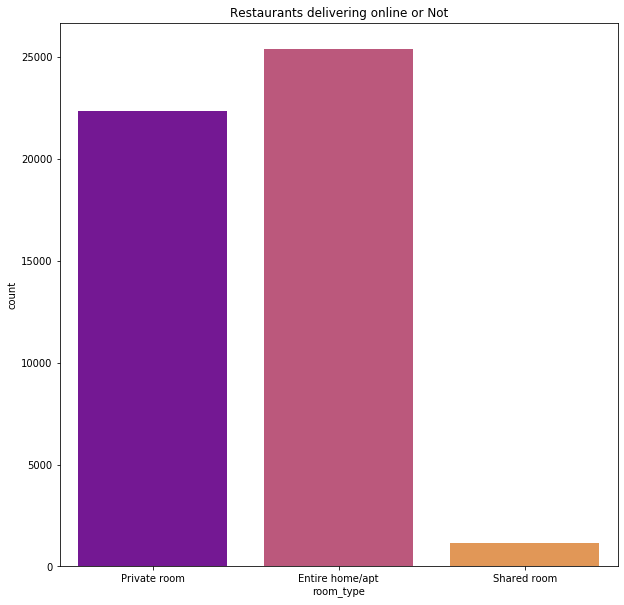

In [16]:
#Restaurants delivering Online or not
sns.countplot(df['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

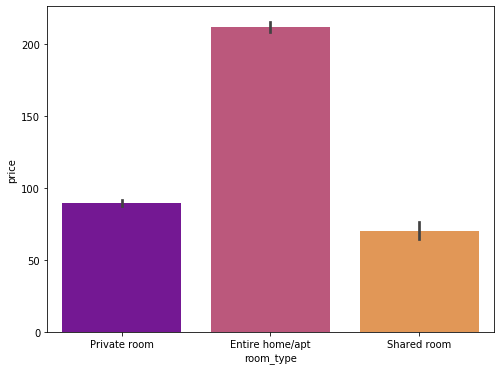

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='room_type', y='price',palette="plasma")

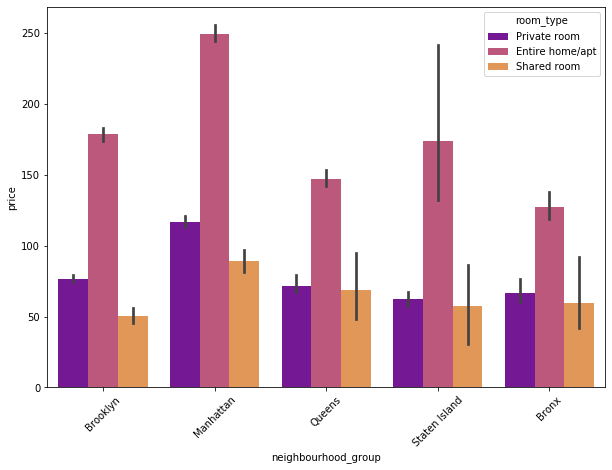

In [18]:
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type" ,palette="plasma", data = df)
plt.xticks(rotation=45)
plt.show()

<Figure size 720x504 with 0 Axes>

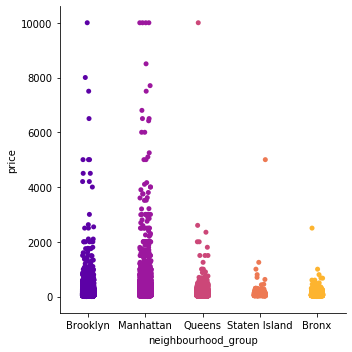

In [19]:
plt.figure(figsize=(10,7))
sns.catplot(x = 'neighbourhood_group', y = 'price',palette="plasma", data = df)
plt.show()

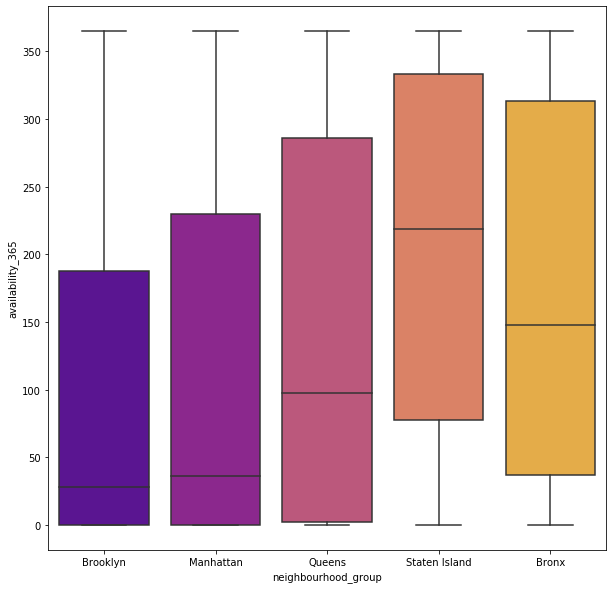

In [20]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='plasma')

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

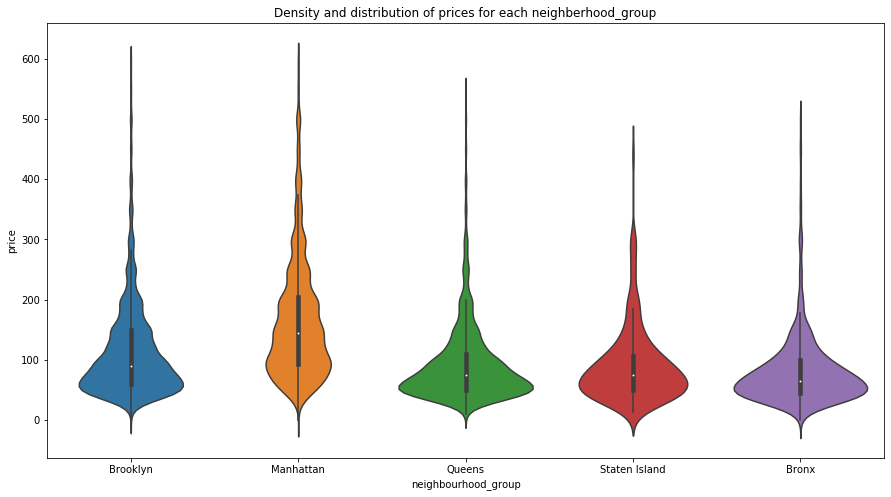

In [21]:
plt.figure(figsize=(15, 8))
#creating a sub-dataframe with no extreme values / less than 600
sub=df[df.price <600]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

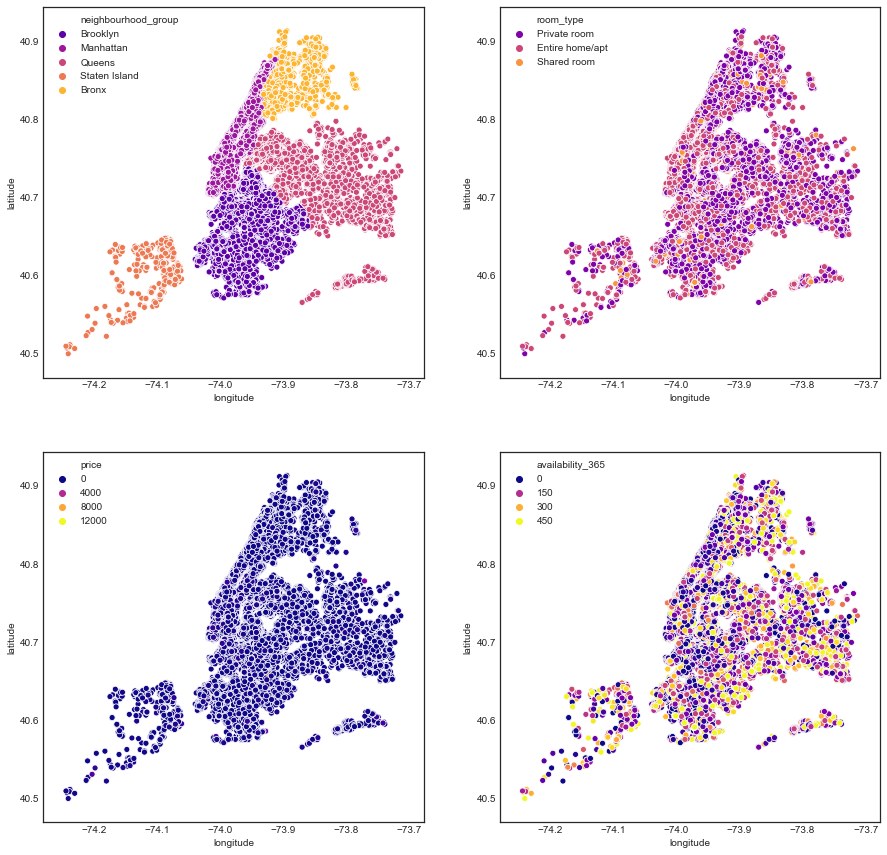

In [22]:
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
plt.subplot(221)
sns.scatterplot(x="longitude", y="latitude",hue="neighbourhood_group" ,palette="plasma", data=df)
plt.subplot(222)
sns.scatterplot(x="longitude", y="latitude",hue="room_type",palette="plasma", data=df)
plt.subplot(223)
sns.scatterplot(x="longitude", y="latitude",hue="price" ,palette="plasma", data=df)
plt.subplot(224)
sns.scatterplot(x="longitude", y="latitude",hue="availability_365" ,palette="plasma", data=df)
plt.show()

## correlation matrix :-

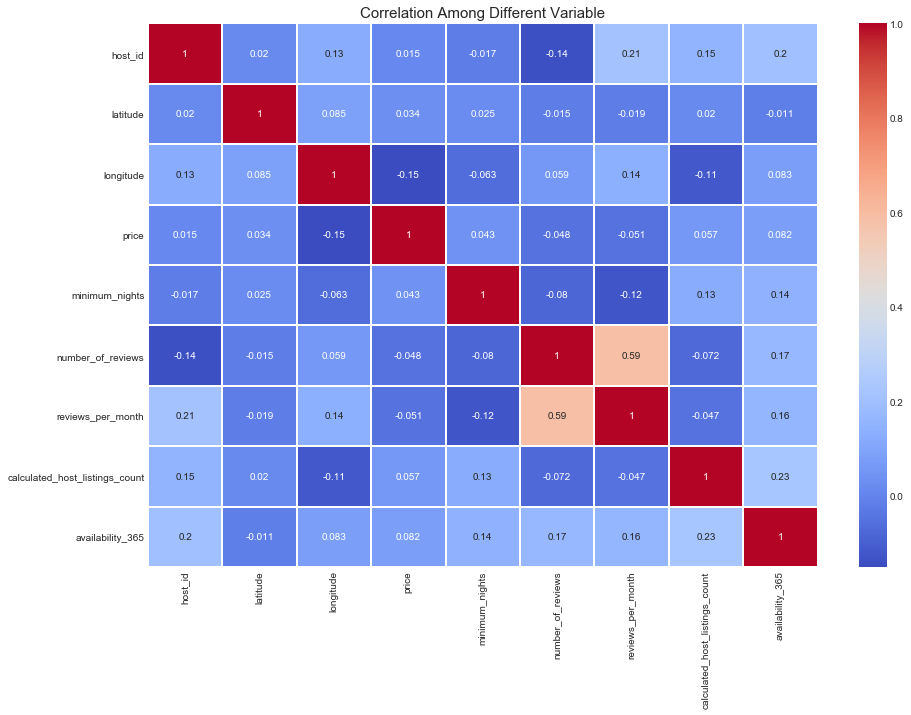

In [23]:
# Prepare the data for correlation
corr=df.corr()

# Relation between different variable
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap = 'coolwarm',linewidth = 1)
plt.title("Correlation Among Different Variable",size=15);

<p> A pairs plot allows us to see both distribution of single variables and relationships between two variables.</p>

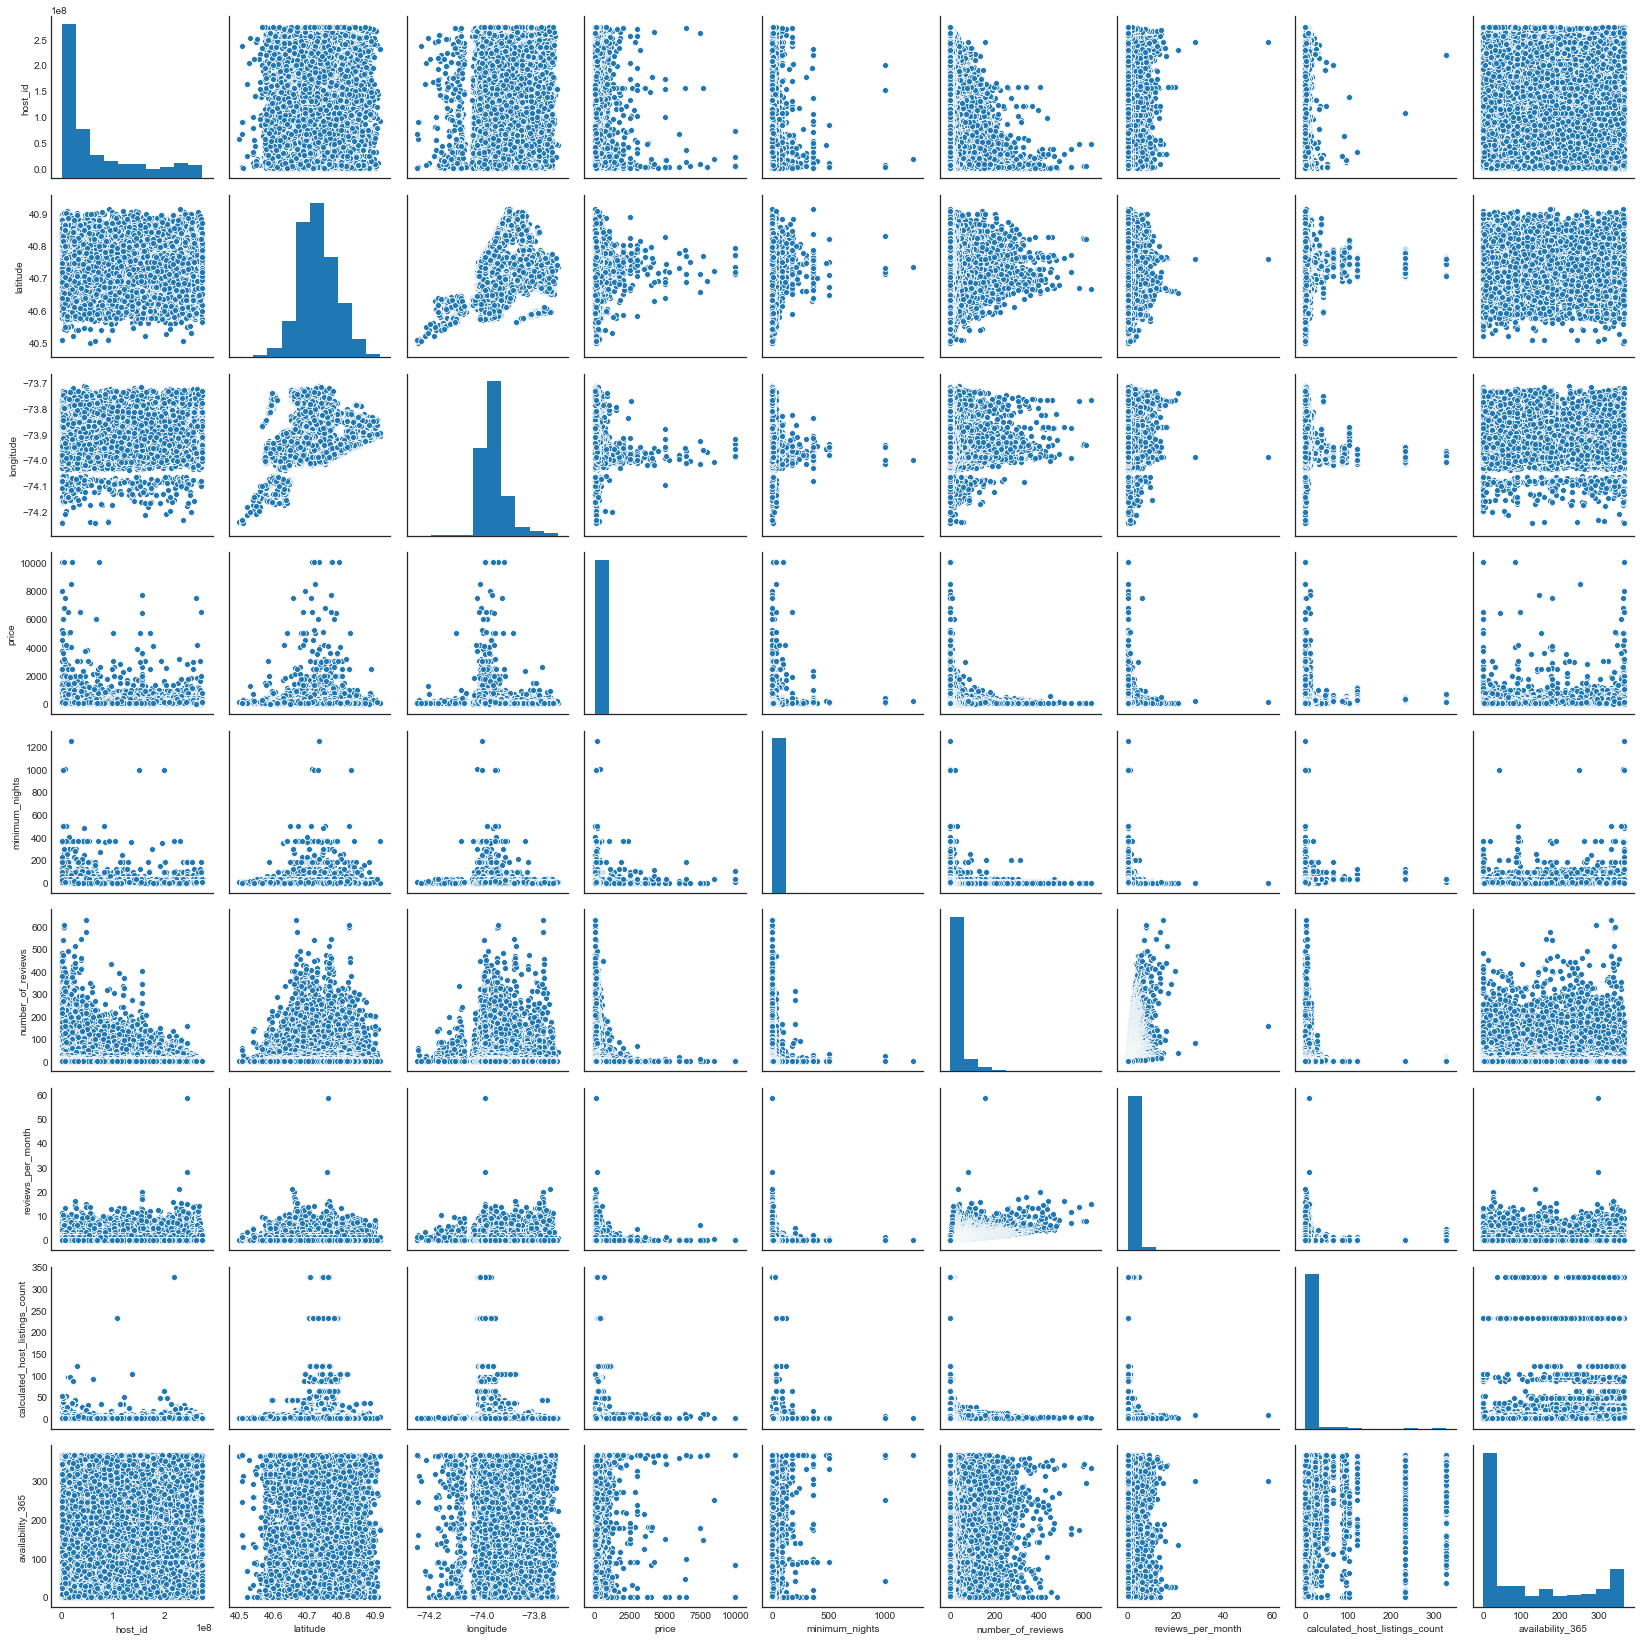

In [24]:
sns.pairplot(df)
plt.show()

## Handle categorical features :-

<p>Label encoding maps categories to numbers.
Frequency encoding maps categories to their frequencies.
Label and Frequency encoding are often used for tree based models.
One-Hot Encoding is often used for non-tree based models.
Interaction of categorical features can help linear and KNN models</p>

In [25]:
df_num = df.select_dtypes(["float64","int64"])

In [26]:
df_num

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,4632,40.80902,-73.94190,150,3,0,0.00,1,365
3,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,7192,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...
48890,8232441,40.67853,-73.94995,70,2,0,0.00,2,9
48891,6570630,40.70184,-73.93317,40,4,0,0.00,2,36
48892,23492952,40.81475,-73.94867,115,10,0,0.00,1,27
48893,30985759,40.75751,-73.99112,55,1,0,0.00,6,2


In [27]:
df_cat = df.select_dtypes(object)

In [28]:
df_cat

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt
...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room
48891,Brooklyn,Bushwick,Private room
48892,Manhattan,Harlem,Entire home/apt
48893,Manhattan,Hell's Kitchen,Shared room


<p>LabelEncoder() method is use to convert categorical text data into model-understandable numerical data</p>

In [29]:
le = LabelEncoder()

In [30]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [31]:
df_cat

,neighbourhood_group,neighbourhood,room_type
0,1,108,1
1,2,127,0
2,2,94,1
3,1,41,0
4,2,61,0
...,...,...,...
48890,1,13,1
48891,1,28,1
48892,2,94,0
48893,2,95,2


In [32]:
df1 = pd.concat([df_cat,df_num],axis=1)

In [33]:
df1

,neighbourhood_group,neighbourhood,room_type,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,1,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2,127,0,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,2,94,1,4632,40.80902,-73.94190,150,3,0,0.00,1,365
3,1,41,0,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,2,61,0,7192,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,1,13,1,8232441,40.67853,-73.94995,70,2,0,0.00,2,9
48891,1,28,1,6570630,40.70184,-73.93317,40,4,0,0.00,2,36
48892,2,94,0,23492952,40.81475,-73.94867,115,10,0,0.00,1,27
48893,2,95,2,30985759,40.75751,-73.99112,55,1,0,0.00,6,2


## Designing price prediction ML model :-
<p>We will use following machine learning models from SciKit Learn to make predictions:</p>
<ul>
<li>Linear Regression</li>
<li>Decision Tree</li>
<li>RandomForestRegressor</li>
<li>GradientBoostingRegressor</li>
</ul>

# *With all features* :-

In [34]:
X = df1.drop("price",axis=1)
y = df1["price"]

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Linear Regression :-

## Model-1 :-

In [36]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

print(model1.intercept_)
print(model1.coef_)

y_pred = model1.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test,y_pred)

print("mse: {}, rmse: {}, r2: {}".format(mse,rmse,r2))

-51891.79298306681
[ 1.10620087e+01  9.85650594e-02 -1.01853249e+02  9.63492131e-08
  1.34450268e+02 -6.29791190e+02  2.83529547e-02 -1.97621708e-01
 -4.98961542e+00 -1.20938068e-01  1.93090195e-01]
mse: 35477.50181593904, rmse: 188.3547233703977, r2: 0.12156804146842604


##  Model-2 using StandardScaler() method :-

<p>The idea behind use of  StandardScaler method is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. </p>

In [37]:
scaler = StandardScaler()
xts = scaler.fit_transform(X_train)
xs = scaler.fit_transform(X_test)

In [38]:
model2 = LinearRegression()
model2.fit(xts,y_train)

print(model2.intercept_)
print(model2.coef_)

y_pred = model2.predict(xs)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test,y_pred)

print("mse: {}, rmse: {}, r2: {}".format(mse,rmse,r2))

154.12239233331115
[  8.10886961   6.77690686 -55.56427676   7.58472787   7.32018944
 -28.8639925    0.6139399   -8.75823372  -8.0210775   -4.00690895
  25.4300602 ]
mse: 35480.0813090714, rmse: 188.36157068009229, r2: 0.12150417256311141


<p> By using standardscaler, we can say that there is no change in r2 score</p>

## DecisionTreeRegressor :-

## Model-3 :-

In [39]:
model3=DecisionTreeRegressor(max_depth=30)

In [40]:
model3.fit(X_train,y_train)

y_pred = model3.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print("mse: {}, rmse: {}, r2: {}".format(mse,rmse,r2))

mse: 107856.2845838897, rmse: 328.41480567095283, r2: -1.6705490087354198


In [41]:
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)
y_predict=DTree.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

-0.24880967549360555

## RandomForestRegressor :-

## Model-4 :-

In [42]:
model4=RandomForestRegressor(n_estimators = 30, random_state = 42)

model4.fit(X_train,y_train)

y_pred = model4.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print("mse: {}, rmse: {}, r2: {}".format(mse,rmse,r2))

mse: 36759.06106077494, rmse: 191.72652675301595, r2: 0.08983630896775496


## GradientBoostingRegressor :-

## Model-5 :-

In [43]:
model5 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01)
model5.fit(X_train,y_train)

y_pred = model5.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print("mse: {}, rmse: {}, r2: {}".format(mse,rmse,r2))

mse: 31856.15159605794, rmse: 178.48291681855142, r2: 0.21123359296872113


# *With selected features and preprocessing of data* :-

In [44]:
# We will make model to only use listings which has price set up. Their are multiple listings with no prices. 
# We will also use listings which has availability_365>0
df=df[df.price>0]
df=df[df.availability_365>0]


<p> Again we use LabelEncoder() method to convert categorical text data into model-understandable numerical data</p>

<p>Values of price arrange in ascending order</p>

In [45]:
from sklearn.preprocessing import LabelEncoder
# Fit label encoder
le = LabelEncoder() 
# Transform labels to normalized encoding.
le.fit(df['neighbourhood_group'])
df['neighbourhood_group']=le.transform(df['neighbourhood_group'])    

le = LabelEncoder()
le.fit(df['neighbourhood'])
df['neighbourhood']=le.transform(df['neighbourhood'])

le =LabelEncoder()
le.fit(df['room_type'])
df['room_type']=le.transform(df['room_type'])

df.sort_values(by='price',ascending=True,inplace=True)

df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
22835,97001292,3,104,40.69085,-73.79916,0,10,1,43,1.68,1,252
31407,91034542,2,111,40.74408,-73.97803,1,10,5,42,2.87,1,2
32810,167570251,1,188,40.66242,-73.99464,0,10,1,14,1.06,1,4
33225,197169969,3,104,40.68939,-73.79886,0,10,2,22,1.76,1,332
35386,47516406,3,215,40.69139,-73.86086,1,10,7,4,0.41,2,180


### Scaling dataset :-

In [46]:
X = df[['neighbourhood_group','neighbourhood','room_type','number_of_reviews','reviews_per_month','availability_365']]
#The np.log10() method returns base-10 logarithm of x for x > 0
y=np.log10(df.price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Linear Regression:-

## Model-6 :-

In [47]:
model6 = LinearRegression()
model6.fit(X_train,y_train)

y_predicts = model6.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test,y_predicts) * 100,
        mean_absolute_error(y_test,y_predicts)
        ))


        Mean Squared Error: 0.2357806529149033
        R2 Score: 41.046136149863386
        Mean Absolute Error: 0.17640746161192733
     


## Gradient Boosting Regressor:-

## Model-7 :-

In [48]:
model7 = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
model7.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
y_predicts = model7.predict(X_test)

print("""
        Mean Squared Error: {}
        Mean Absolute Error: {}
        R2 Score: {}
        
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        mean_absolute_error(y_test,y_predicts),
        r2_score(y_test,y_predicts) * 100
        
        ))


        Mean Squared Error: 0.21075527121725496
        Mean Absolute Error: 0.15464038590998772
        R2 Score: 52.89653741811912
        
     


## Random Forest Regressor:-

## Model-8 :-

In [50]:
### Initially, lets build a tree without any constraints.
model8 = RandomForestRegressor(n_estimators=300)
model8.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [52]:
y_predicts = model8.predict(X_test)
# score() method to determine model accuracy
print(model8.score(X_train,y_train))

0.9193796508188795


In [53]:
model8.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [54]:
y_predicts = model8.predict(X_test)

print("""
        Mean Squared Error: {}
        Mean Absolute Error: {}
        R2 Score: {}
        
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        mean_absolute_error(y_test,y_predicts),
        r2_score(y_test,y_predicts) * 100
        
        ))


        Mean Squared Error: 0.2105757481299017
        Mean Absolute Error: 0.15183567573415485
        R2 Score: 52.97674948081843
        
     


# Prediction :-

### Prediction using Random Forest Regressor model:-

In [55]:

df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_predicts, 0)})
df.head(10)


,Actual,Predicted
34969,69.0,44.0
36826,149.0,119.0
5146,195.0,148.0
28125,50.0,83.0
9134,75.0,78.0
12541,63.0,61.0
43075,55.0,46.0
39725,100.0,107.0
38914,300.0,180.0
19614,218.0,231.0


# Conclusion :-
<ul>
<li>The price standard variation on the data set is quite high.</li>
<li>Separating the dataset by price categories is usefull for the analysis.</li>
<li>The most interesting variables regarding to price prediction are:-</li>
1) Location
2) Room type
3) calculated_host_listings_count
4) Number of review
5) neighbourhood_group
<li>Price prediction models are not performing well.</li>
<li>Best score is between 50 % to 60 %.</li>
<li>Difference between Prediction prices and actual price is more. </li>
</ul>